# Coin segmentation
## Using watershed and region properties

### https://www.youtube.com/watch?v=STnoJ3YCWus

In [1]:
import skimage
skimage.__version__

'0.15.0'

In [2]:
import numpy as np

# make sure plot inside of Jupyter
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
from skimage import data
coins = data.coins()
print(coins)

[[ 47 123 133 ...  14   3  12]
 [ 93 144 145 ...  12   7   7]
 [126 147 143 ...   2  13   3]
 ...
 [ 81  79  74 ...   6   4   7]
 [ 88  82  74 ...   5   7   8]
 [ 91  79  68 ...   4  10   7]]


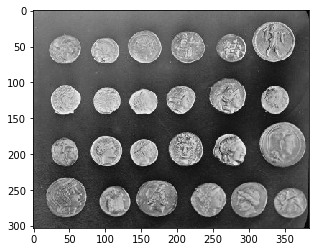

In [4]:
plt.imshow(coins, cmap = "gray")
plt.show()

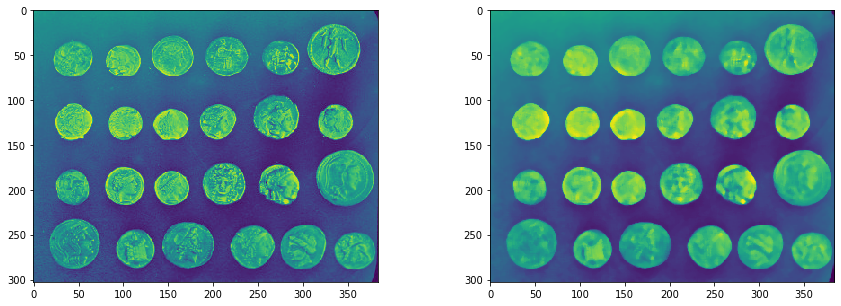

In [5]:
from skimage import filters

coins_denoised = filters.median(coins, selem = np.ones((5, 5)))

f, (ax0, ax1) = plt.subplots(1, 2, figsize = (15, 5))
ax0.imshow(coins)
ax1.imshow(coins_denoised)

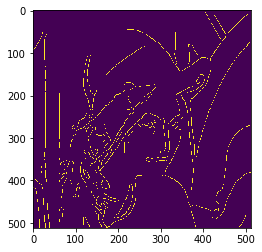

In [12]:
from skimage import feature
from skimage import io
#io.imsave("coins_gray.jpg", coins)
coins = io.imread("lena.jpg", "gray")
edges = skimage.feature.canny(coins, sigma = 3)

plt.imshow(edges)
plt.show()

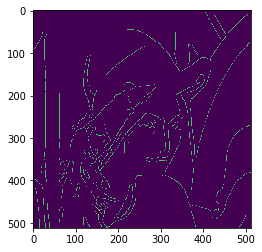

In [18]:
from scipy.ndimage import distance_transform_edt
dt = distance_transform_edt(edges)

plt.imshow(dt)
plt.show()

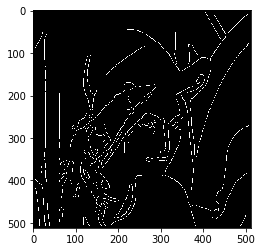

In [15]:
local_max = feature.peak_local_max(dt, indices = False, min_distance = 5)
plt.imshow(local_max, cmap = 'gray'); 

In [16]:
peak_idx = feature.peak_local_max(dt, indices = True, min_distance = 5)
peak_idx[:5]

array([[506, 487],
       [506, 486],
       [506, 381],
       [506, 171],
       [506, 170]])

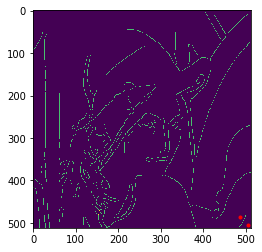

In [20]:
plt.plot(peak_idx[1], peak_idx[0], 'r. ')
plt.imshow(dt)
plt.show()

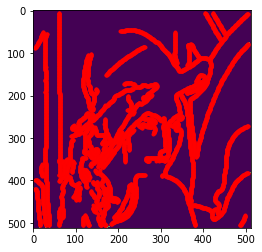

In [21]:
plt.plot(peak_idx[:, 1], peak_idx[:, 0], 'r. ')
plt.imshow(dt)
plt.show()

In [22]:
from skimage import measure

markers = measure.label(local_max)

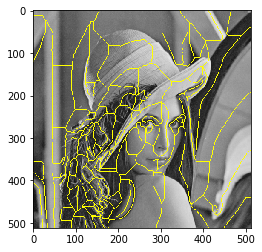

In [25]:
from skimage import morphology, segmentation

labels = morphology.watershed(-dt, markers)
plt.imshow(segmentation.mark_boundaries(coins, labels))
plt.show()

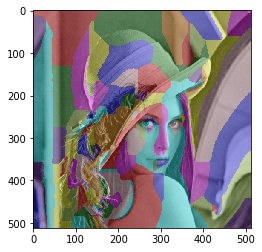

In [27]:
from skimage import color
plt.imshow(color.label2rgb(labels, image = coins))
plt.show()

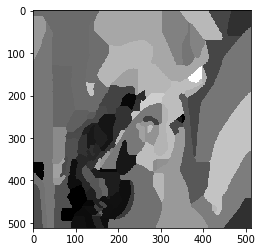

In [29]:
plt.imshow(color.label2rgb(labels, image = coins, kind = "avg"), cmap = "gray")
plt.show()

In [36]:
measure.regionprops?

In [30]:
regions = measure.regionprops(labels, intensity_image = coins)

(array([ 9., 11.,  6.,  7.,  4.,  9.,  5.,  4.,  6.,  7.,  4.,  6.,  4.,
         3.,  9.,  3.,  1.,  0.,  0.,  1.]),
 array([0.19821636, 0.22628439, 0.25435243, 0.28242047, 0.3104885 ,
        0.33855654, 0.36662458, 0.39469261, 0.42276065, 0.45082868,
        0.47889672, 0.50696476, 0.53503279, 0.56310083, 0.59116887,
        0.6192369 , 0.64730494, 0.67537297, 0.70344101, 0.73150905,
        0.75957708]),
 <a list of 20 Patch objects>)

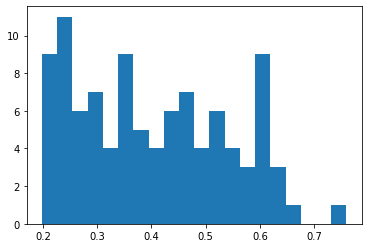

In [31]:
region_means = [r.mean_intensity for r in regions]
plt.hist(region_means, bins = 20)

In [32]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)

region_means = np.array(region_means).reshape(-1, 1)
model.fit(np.array(region_means).reshape(-1, 1))
print(model.cluster_centers_)

[[0.29299691]
 [0.53494164]]


In [33]:
bg_fg_labels = model.predict(region_means)
bg_fg_labels

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [34]:
classified_labels = labels.copy()
for bg_fg, region in zip(bg_fg_labels, regions):
    classified_labels[tuple(region.coords.T)] = bg_fg

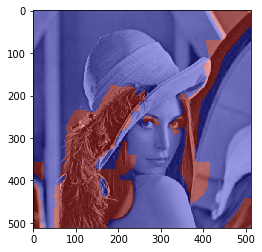

In [35]:
plt.imshow(color.label2rgb(classified_labels, image = coins))
plt.show()